In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data/DA314_S7_EmployeeAttrition_Data_Practice.csv')

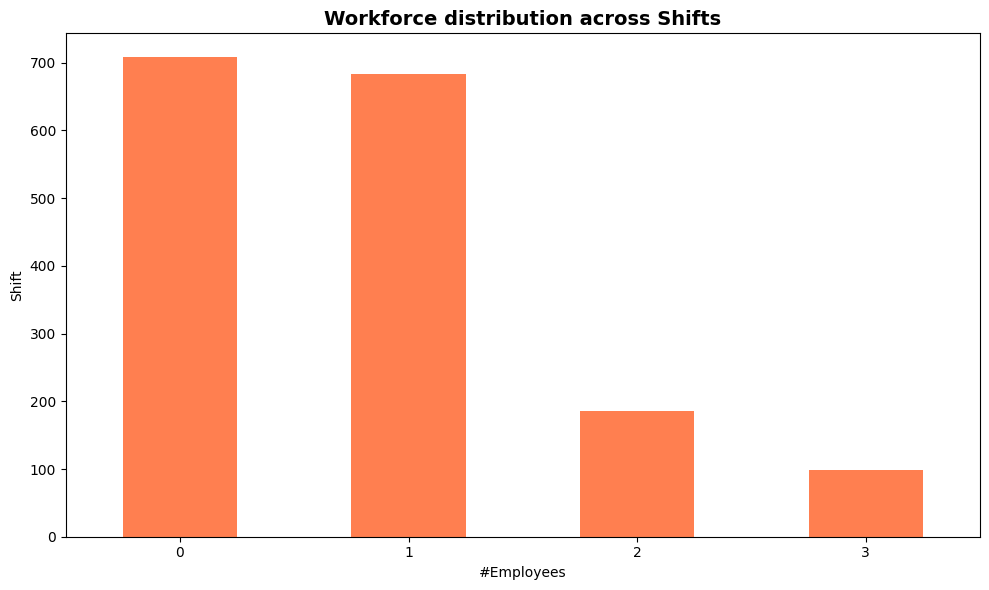

In [14]:
# Shift Distribution Analysis
shift_counts = df['Shift'].value_counts().sort_index()
shift_percentages = df['Shift'].value_counts(normalize=True).sort_index() * 100

# Visualize Shift Distribution
fig, ax = plt.subplots(figsize=(10, 6))
shift_counts.plot(kind='bar', color='coral', ax=ax)
ax.set_title('Workforce distribution across Shifts', fontsize=14, fontweight='bold')
ax.set_xlabel('#Employees')
ax.set_ylabel('Shift')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

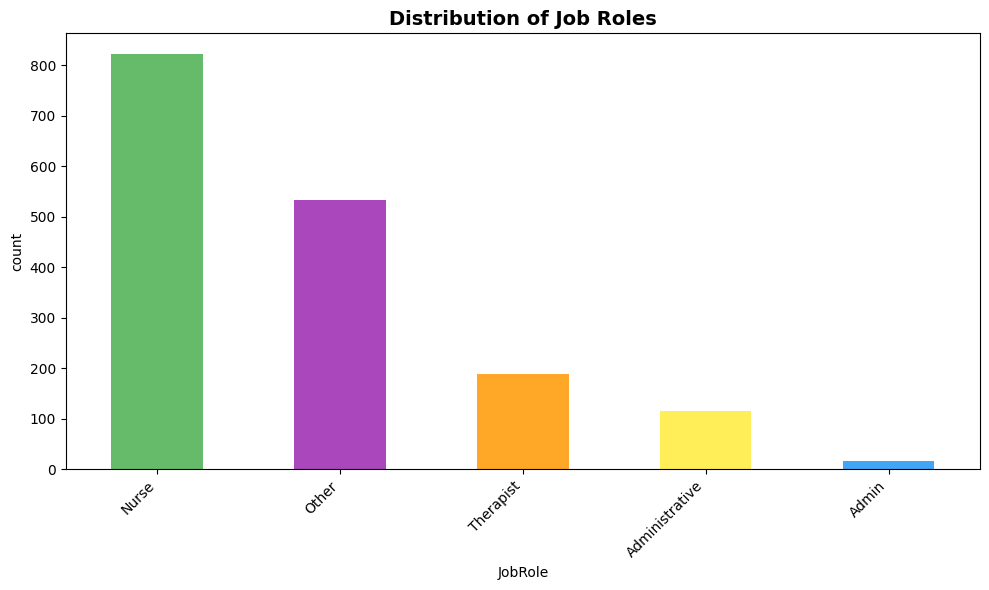

In [15]:
# JobRole Distribution Analysis
jobrole_counts = df['JobRole'].value_counts()
jobrole_percentages = df['JobRole'].value_counts(normalize=True) * 100

# Visualize JobRole Distribution
fig, ax = plt.subplots(figsize=(10, 6))
jobrole_counts.plot(kind='bar', color=['#66bb6a', '#ab47bc', '#ffa726', '#ffee58', '#42a5f5'], ax=ax)
ax.set_title('Distribution of Job Roles', fontsize=14, fontweight='bold')
ax.set_xlabel('JobRole')
ax.set_ylabel('count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

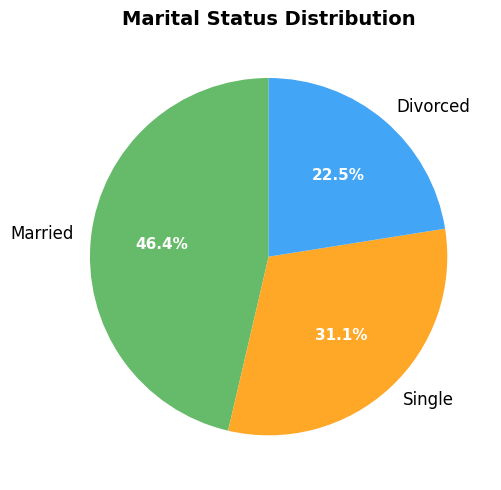

In [16]:
# MaritalStatus Distribution Analysis
marital_counts = df['MaritalStatus'].value_counts()
marital_percentages = df['MaritalStatus'].value_counts(normalize=True) * 100

# Visualize MaritalStatus Distribution as Pie Chart
fig, ax = plt.subplots(figsize=(9, 5))
colors = ['#66bb6a', '#ffa726', '#42a5f5']
wedges, texts, autotexts = ax.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', 
                                     colors=colors, startangle=90, textprops={'fontsize': 12})
ax.set_title('Marital Status Distribution', fontsize=14, fontweight='bold')

# Make percentage text bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

plt.tight_layout()
plt.show()

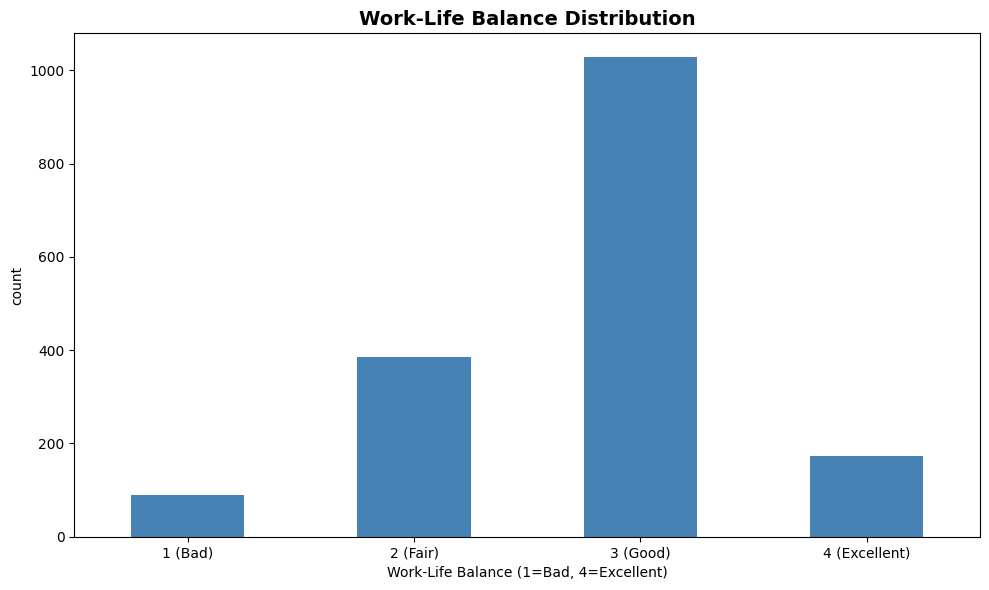

In [17]:
# WorkLifeBalance Distribution Analysis
wlb_counts = df['WorkLifeBalance'].value_counts().sort_index()
wlb_percentages = df['WorkLifeBalance'].value_counts(normalize=True).sort_index() * 100

# Visualize WorkLifeBalance Distribution
fig, ax = plt.subplots(figsize=(10, 6))
wlb_counts.plot(kind='bar', color='steelblue', ax=ax)
ax.set_title('Work-Life Balance Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Work-Life Balance (1=Bad, 4=Excellent)')
ax.set_ylabel('count')
ax.set_xticklabels(['1 (Bad)', '2 (Fair)', '3 (Good)', '4 (Excellent)'], rotation=0)
plt.tight_layout()
plt.show()

# Calculate excellent percentage for later use
excellent_pct = (wlb_counts[4] + wlb_counts[3]) / wlb_counts.sum() * 100

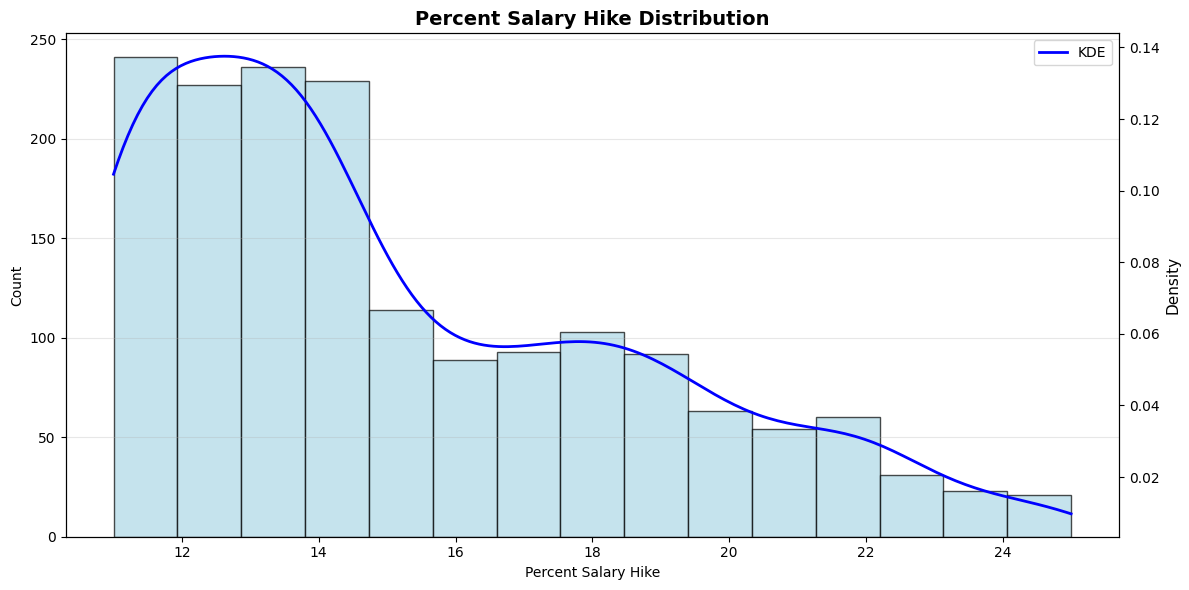

In [18]:
# PercentSalaryHike Distribution Analysis
salary_hike = df['PercentSalaryHike']

# Visualize PercentSalaryHike Distribution
fig, ax = plt.subplots(figsize=(12, 6))
n, bins, patches = ax.hist(salary_hike, bins=15, color='lightblue', edgecolor='black', alpha=0.7)

# Add KDE (Kernel Density Estimate)
from scipy import stats
kde = stats.gaussian_kde(salary_hike)
x_range = np.linspace(salary_hike.min(), salary_hike.max(), 200)
ax2 = ax.twinx()
ax2.plot(x_range, kde(x_range), 'b-', linewidth=2, label='KDE')
ax2.set_ylabel('Density', fontsize=11)
ax2.legend(loc='upper right')

ax.set_title('Percent Salary Hike Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Percent Salary Hike')
ax.set_ylabel('Count')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [19]:
# Summary statistics for reference
below_15 = (salary_hike < 15).sum()
above_20 = (salary_hike >= 20).sum()